In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Membaca dataset
data_nilai = pd.read_csv('Sample Nilai Alumni Prodi Informatika_Ver1.csv')
data_profesi = pd.read_csv('Sample Profesi Pekerjaan Alumni Prodi Informatika Universitas Gunadarma_Ver1.csv')

In [17]:
data_nilai.head(10)

,NPM,KDMK,NAMA MK,JENIS,SKS,NILAI
0,50414234,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
1,50414279,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
2,50414496,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
3,50414623,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
4,50414925,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
5,50415185,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
6,50415335,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
7,50415370,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,C
8,50415582,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
9,50415780,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B


In [18]:
data_profesi.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer
5,51414049,ANDI MUHADIR AMIN,3.19,Mobile App Developer
6,51414092,ANDINITA NURUL HIDAYAH,3.57,Software Quality Engineer
7,51414196,ANGGA ELVIN PRATAMA,3.31,Data Engineer
8,51414598,ARIF RACHMAN,3.32,Graphic Designer
9,51414845,AUNI RACHMAN,3.20,Software Quality Assurance


In [19]:
# Remove the columns 'KDMK' and 'JENIS' from the 'nilai_alumni' dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['KDMK', 'JENIS'])


In [20]:
# Merge the two datasets based on 'NPM' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi, nilai_alumni_cleaned, on='NPM', how='inner')

In [21]:
merged_data.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,NAMA MK,SKS,NILAI
0,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 1,2,A
1,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 2,2,B
2,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 3,2,A
3,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,ALGORITMA DAN PENGOLAHAN PARALEL,3,B
4,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,ALGORITMA DEEP LEARNING,2,A
5,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,ARSITEKTUR KOMPUTER,2,A
6,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,BAHASA INDONESIA,2,A
7,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,BAHASA INGGRIS 1,1,B
8,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,BAHASA INGGRIS 2,1,B
9,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,BAHASA INGGRIS BISNIS 1,1,A


In [22]:
# Change the data type of the 'NAMA MK' column to INDEX
merged_data['INDEX'] = merged_data['NAMA MK']

In [23]:
# Instead of concatenating all the grades, we will pivot the data so that each student gets the grade for the subject they took.
# This means we'll create a matrix where the subjects are columns, and the values are the grades where applicable.

# We will first create a pivot table with 'NPM' as the index and subjects as the columns.

# Pivot table to have subjects as columns with the corresponding grades, and NaN for missing entries
pivoted_grades = merged_data.pivot_table(
    index=['NPM', 'Nama Lengkap', 'IPK', 'Klasifikasi Profesi'], 
    columns='INDEX', 
    values='NILAI', 
    aggfunc='first'  # Take the first occurrence if there are duplicates
).reset_index()

# Merge the pivoted table back to the original data to align with the rest of the information
# This will leave 0 for subjects not taken by each student

pivoted_grades.fillna(0, inplace=True)

pivoted_grades.head(10)

INDEX,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer,A,B,A,B,A,A,...,B,A,C,A,C,B,B,0,B,0
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer,B,B,B,B,C,B,...,A,A,B,B,B,B,A,0,B,0
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst,B,B,B,B,A,A,...,A,A,A,C,B,A,A,0,B,0
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer,A,B,B,B,B,A,...,B,B,A,A,B,A,A,0,B,0
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer,A,B,A,A,A,A,...,0,A,A,A,A,A,A,0,B,0
5,50415185,ADITYA MAHFUZHA,3.29,IT Project Manager,B,B,A,B,A,B,...,B,A,A,B,B,B,A,0,B,0
6,50415335,AHMAD FURQAN,3.36,Network Engineer,B,B,A,B,B,A,...,C,A,B,A,B,B,A,0,B,0
7,50415370,AHMAD SYUKRON,3.67,Software Quality Assurance,C,A,A,A,A,A,...,0,A,A,B,A,A,A,0,B,0
8,50415582,ALVIN RAMADHANI,3.43,Mobile App Developer,B,B,A,B,A,A,...,B,B,B,B,A,A,A,0,B,0
9,50415780,ANGGER RIDHO ABDULLAH,3.09,Software Engineer,B,B,B,B,A,B,...,B,B,C,A,A,B,A,0,B,0


In [24]:
# Replace NaN values with 0 for the grade columns
pivoted_grades_filled = pivoted_grades.fillna(0)

# Display the updated data with NaN replaced by 0
pivoted_grades_filled.head(10)

INDEX,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer,A,B,A,B,A,A,...,B,A,C,A,C,B,B,0,B,0
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer,B,B,B,B,C,B,...,A,A,B,B,B,B,A,0,B,0
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst,B,B,B,B,A,A,...,A,A,A,C,B,A,A,0,B,0
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer,A,B,B,B,B,A,...,B,B,A,A,B,A,A,0,B,0
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer,A,B,A,A,A,A,...,0,A,A,A,A,A,A,0,B,0
5,50415185,ADITYA MAHFUZHA,3.29,IT Project Manager,B,B,A,B,A,B,...,B,A,A,B,B,B,A,0,B,0
6,50415335,AHMAD FURQAN,3.36,Network Engineer,B,B,A,B,B,A,...,C,A,B,A,B,B,A,0,B,0
7,50415370,AHMAD SYUKRON,3.67,Software Quality Assurance,C,A,A,A,A,A,...,0,A,A,B,A,A,A,0,B,0
8,50415582,ALVIN RAMADHANI,3.43,Mobile App Developer,B,B,A,B,A,A,...,B,B,B,B,A,A,A,0,B,0
9,50415780,ANGGER RIDHO ABDULLAH,3.09,Software Engineer,B,B,B,B,A,B,...,B,B,C,A,A,B,A,0,B,0


In [25]:
# Define the grade mapping
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

# Apply the mapping to all columns except the first four (NPM, Nama Lengkap, IPK, Klasifikasi Profesi)
pivoted_grades_numeric = pivoted_grades_filled.copy()
pivoted_grades_numeric.iloc[:, 4:] = pivoted_grades_numeric.iloc[:, 4:].replace(grade_mapping)

# Display the updated dataframe
pivoted_grades_numeric.head(10)

INDEX,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer,4,3,4,3,4,4,...,3,4,2,4,2,3,3,0,3,0
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer,3,3,3,3,2,3,...,4,4,3,3,3,3,4,0,3,0
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst,3,3,3,3,4,4,...,4,4,4,2,3,4,4,0,3,0
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer,4,3,3,3,3,4,...,3,3,4,4,3,4,4,0,3,0
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer,4,3,4,4,4,4,...,0,4,4,4,4,4,4,0,3,0
5,50415185,ADITYA MAHFUZHA,3.29,IT Project Manager,3,3,4,3,4,3,...,3,4,4,3,3,3,4,0,3,0
6,50415335,AHMAD FURQAN,3.36,Network Engineer,3,3,4,3,3,4,...,2,4,3,4,3,3,4,0,3,0
7,50415370,AHMAD SYUKRON,3.67,Software Quality Assurance,2,4,4,4,4,4,...,0,4,4,3,4,4,4,0,3,0
8,50415582,ALVIN RAMADHANI,3.43,Mobile App Developer,3,3,4,3,4,4,...,3,3,3,3,4,4,4,0,3,0
9,50415780,ANGGER RIDHO ABDULLAH,3.09,Software Engineer,3,3,3,3,4,3,...,3,3,2,4,4,3,4,0,3,0


In [26]:
# Assuming your dataframe is named 'df' and contains a column with grades
# Replace 'grade_column' with the actual name of your grade column

# To see the count of each grade
grade_counts = merged_data['NILAI'].value_counts()
grade_counts


NILAI
A    8278
B    6297
C     793
D      52
Name: count, dtype: int64

In [27]:
# Get a random NPM from the data
random_npm = pivoted_grades_numeric['NPM'].sample().values[0]

print(f"Randomly selected NPM: {random_npm}")

# Get the data for this random NPM
random_student_data = pivoted_grades_numeric[pivoted_grades_numeric['NPM'] == random_npm]

# Display the data for the randomly selected student
random_student_data

Randomly selected NPM: 57416031


INDEX,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
175,57416031,SHYFA ANDIANTONO,3.64,Full Stack Developer,4,4,4,3,4,3,...,0,4,4,4,4,4,4,0,3,0


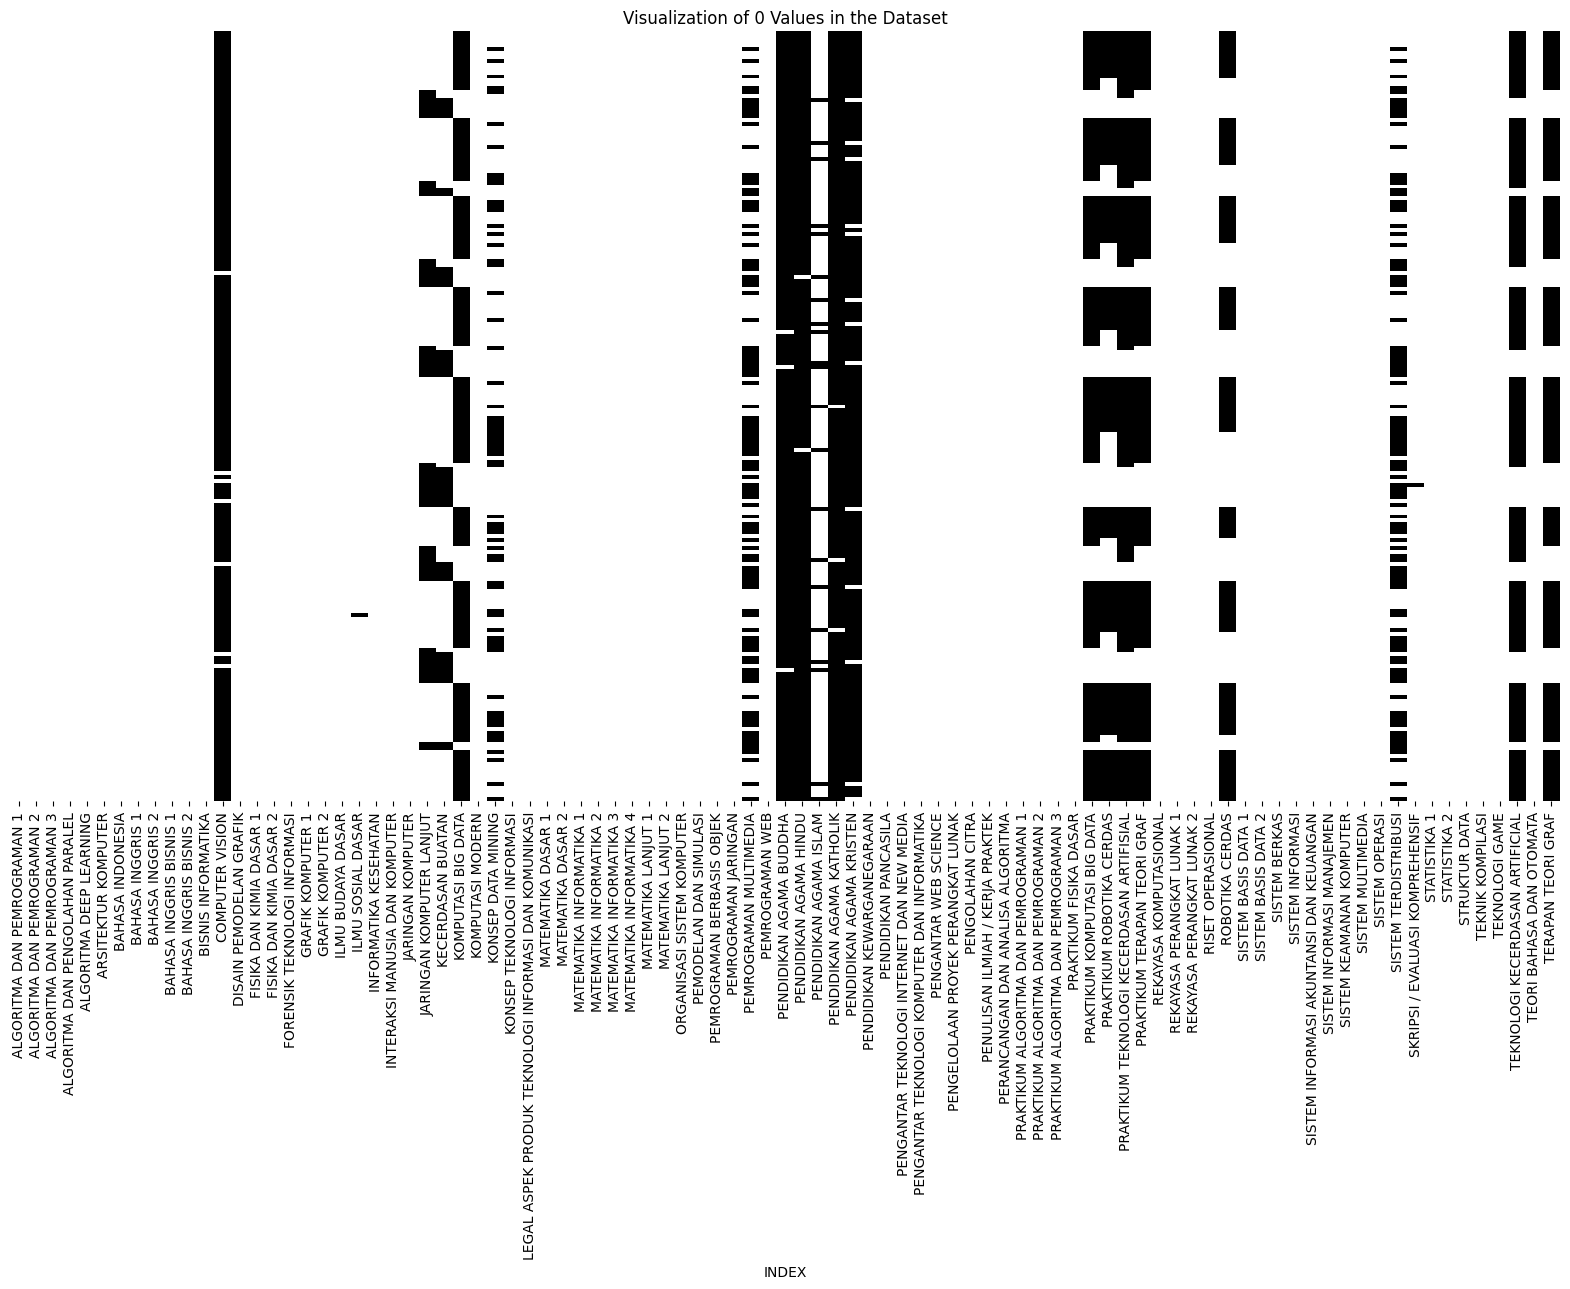

In [28]:
# Create a binary mask where 0 is True and non-zero is False
mask = pivoted_grades_numeric.iloc[:, 4:] == 0

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(mask, cmap='binary', cbar=False, yticklabels=False)

# Set the title
plt.title('Visualization of 0 Values in the Dataset')

# Show the plot
plt.show()
